In [4]:
import csv
import pandas as pd
import googlemaps
import requests
import urllib.request
import time
from bs4 import BeautifulSoup


In [5]:
url = 'http://www.justice.gov/eoir/eoir-immigration-court-listing'
response = requests.get(url)
response

<Response [200]>

In [ ]:
# once we have a list of judges we can look them up on rate my judge 
# https://www.ratemyimmigrationjudge.com/listing/hon-john-w-cortes-immigration-judge-new-york-varick-immigration-court/

In [6]:
soup = BeautifulSoup(response.text,'html.parser')

In [7]:
CIJ = soup.findAll('a')[53:93]
for judge in CIJ:
    print(judge.text)

Tracy Short
Daniel H. Weiss 
Mary Cheng
Daniel J. Daugherty
Sheila McNulty
E. Mark Barcus
Jefferson B. Brown
David Cheng
Grady A. Crooks
Eric L. Dillow
John R. Doolittle II
Irene C. Feldman
Melissa Joy Garcia
Colleen M. Glaser-Allen
Renae M. Hansell
Megan B. Herndon
Jonathan W. Hitesman
Theresa Holmes-Simmons 
Amy C. Hoogasian
Megan R. Jackler
Matthew W. Kaufman
Daniel P. Kinnicutt
Charles P. Koutras
Joy Lampley-Fortson
Scott D. Laurent
Anna C. Little
Lisa Luis
Daren K. Margolin
H. Kevin Mart 
James F. McCarthy III
Jeffrey S. Miller 
Tara Naselow-Nahas
Alfredia Owens 
Anne Kristina Perry 
Rodin Rooyani
Theresa M. Scala 
Vance H. Spath
Elisa M. Sukkar 
Khalilah M. Taylor 
Ubaid ul-Haq


In [8]:
# soup.findAll('a')[128:193]

In [9]:
ct_info = [addy.text.strip() for addy in soup.findAll('td')[1:415]]

In [10]:
import pandas as pd
import numpy as np
names = ['Court','Address','Judges','Immigration Judges', 'Court Administrator']
columns = ['Court','Address','Judges','Ct Admin']
result = list(filter(lambda x: x not in names,ct_info))
del result[268]
# print(result[268:269])

print(result[268:272])
print(result[272:276])



['Richmond IAC', '10 S. 6th Street\n\t\t\tRichmond, VA 23219\n\t\t\t804-343-2900', 'Kaplan, Elliot M.\n\t\t\tNapier, Wade T.\n\t\t\tPalmer, Brian T.\n\t\t\tRivera, Tamaira\n\t\t\tRobertson, David H.\n\t\t\tTerrien, Jeb T.', 'English-Figueroa, Yolanda']
['Seattle', '915 2nd Ave., Suite 613\n\t\t\tSeattle, WA 98174\n\t\t\t206-342-7200', 'Evans, David W.\n\t\t\tJohnson, Shane E.\n\t\t\tMcSeveney, Robert B.C.\n\t\t\tParchert, Brett M.\n\t\t\tSogabe, Kenneth S.\n\t\t\tWindrow, Hayden', 'Neifert, Joseph (Acting)']


In [11]:
print(len(result))
num_courts = len(result)//4
add_list=[]
for i in range(num_courts):
    to_add = np.array([result[i*4],result[i*4+1],result[i*4+2],result[i*4+3]])
    add_list.append(to_add)
   

280


In [12]:
df2 = pd.DataFrame(np.array(add_list),columns=columns)
df2.tail()

,Court,Address,Judges,Ct Admin
65,Arlington,"1901 South Bell Street, Suite 200\n\t\t\tArlin...","Barnes, John Cody\n\t\t\tBryant, John M.\n\t\t...","Cortes, Juan"
66,Falls Church IAC,"5107 Leesburg Pike\n\t\t\tFalls Church, VA 220...","De Cardona, Lisa\n\t\t\tFarrar-Crockett, Emily...","Meyers, Natalie"
67,Richmond IAC,"10 S. 6th Street\n\t\t\tRichmond, VA 23219\n\t...","Kaplan, Elliot M.\n\t\t\tNapier, Wade T.\n\t\t...","English-Figueroa, Yolanda"
68,Seattle,"915 2nd Ave., Suite 613\n\t\t\tSeattle, WA 981...","Evans, David W.\n\t\t\tJohnson, Shane E.\n\t\t...","Neifert, Joseph (Acting)"
69,Tacoma,"1623 East J Street, Suite 3\n\t\t\tTacoma, WA ...","Fitting, Tammy\n\t\t\tFloyd, Charles Neil\n\t\...","Neifert, Joseph"


In [13]:

df2 = df2.replace(r'\t',' ', regex=True)

df2.loc[29]

Court                                                 Detroit
Address     P.V. McNamara Federal Building\n   477 Michiga...
Judges      Gorland, Jennifer M.\n   Jebson, Mark J.\n   P...
Ct Admin                                     Shelley, Shandra
Name: 29, dtype: object

In [14]:
new = df2['Address'].str.split('\n', n = 5, expand = True)

df2['Street']= new[0]
df2['CityZip']= new[1]
df2['Phone']= new[2]
    

In [15]:
new[25:30]

,0,1,2,3,4,5
25,One Canal Place,"365 Canal Street, Suite 500","New Orleans, LA 70130",504-589-3992,None,None
26,1900 E. Whatley Road,"Oakdale, LA 71463",318-335-0365,None,None,None
27,George Fallon Federal Building,"31 Hopkins Plaza, Rm. 440","Baltimore, MD 21201",410-962-3092,None,None
28,JFK Federal Building,15 New Sudbury Street,Room 320,"Boston, MA 02203",617-565-3080,None
29,P.V. McNamara Federal Building,"477 Michigan Avenue, Suite 440","Detroit, MI 48226",313-226-2603,None,None


In [16]:
df2 = df2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [17]:
for i in range(len(df2['Street'])):
    try:
        int(df2['Street'][i][0])
    except:
        df2['Street'][i] = new[1][i]
        df2['CityZip'][i]= new[2][i]
        df2['Phone'][i]= new[3][i]

    try:
        int(df2['CityZip'][i][-6:])
    except:
        df2['CityZip'][i]= new[2][i]
        df2['Phone'][i]= new[3][i]


In [18]:
df2.loc[25:30]

,Court,Address,Judges,Ct Admin,Street,CityZip,Phone
25,New Orleans,"One Canal Place\n 365 Canal Street, Suite 50...","La Rocca, Joseph B.\n Marquez, Charlotte S.\...","González, Robert C. (Acting)","365 Canal Street, Suite 500","New Orleans, LA 70130",504-589-3992
26,Oakdale,"1900 E. Whatley Road\n Oakdale, LA 71463\n ...","Ashworth, Sherron\n Duck Jr., John A.\n La...","Davis, J. Thomas (Acting)",1900 E. Whatley Road,"Oakdale, LA 71463",318-335-0365
27,Baltimore,George Fallon Federal Building\n 31 Hopkins ...,"Crosland, David W.\n Golparvar, Kuyomars Q.\...","Cook, Brenda","31 Hopkins Plaza, Rm. 440","Baltimore, MD 21201",410-962-3092
28,Boston,JFK Federal Building\n 15 New Sudbury Street...,"Feder, Robin\n Furlong Jr., John M.\n Gagn...","Xu, Fang",15 New Sudbury Street,Room 320,"Boston, MA 02203"
29,Detroit,P.V. McNamara Federal Building\n 477 Michiga...,"Gorland, Jennifer M.\n Jebson, Mark J.\n P...","Shelley, Shandra","477 Michigan Avenue, Suite 440","Detroit, MI 48226",313-226-2603
30,Fort Snelling,Bishop Henry Whipple Federal Bldg.\n 1 Feder...,"Carr, M. Audrey\n Dierkes, Joseph\n Hansen...","Baldwin, Elizabeth","1 Federal Drive, Suite 1850","Fort Snelling, MN 55111",612-725-3765


In [19]:
# selecting rows based on condition 
filtCZ = df2['CityZip'].str.split()
# filtCZ[29][0]
df2['cz_fix'] = filtCZ
df2.loc[25:30]


,Court,Address,Judges,Ct Admin,Street,CityZip,Phone,cz_fix
25,New Orleans,"One Canal Place\n 365 Canal Street, Suite 50...","La Rocca, Joseph B.\n Marquez, Charlotte S.\...","González, Robert C. (Acting)","365 Canal Street, Suite 500","New Orleans, LA 70130",504-589-3992,"[New, Orleans,, LA, 70130]"
26,Oakdale,"1900 E. Whatley Road\n Oakdale, LA 71463\n ...","Ashworth, Sherron\n Duck Jr., John A.\n La...","Davis, J. Thomas (Acting)",1900 E. Whatley Road,"Oakdale, LA 71463",318-335-0365,"[Oakdale,, LA, 71463]"
27,Baltimore,George Fallon Federal Building\n 31 Hopkins ...,"Crosland, David W.\n Golparvar, Kuyomars Q.\...","Cook, Brenda","31 Hopkins Plaza, Rm. 440","Baltimore, MD 21201",410-962-3092,"[Baltimore,, MD, 21201]"
28,Boston,JFK Federal Building\n 15 New Sudbury Street...,"Feder, Robin\n Furlong Jr., John M.\n Gagn...","Xu, Fang",15 New Sudbury Street,Room 320,"Boston, MA 02203","[Room, 320]"
29,Detroit,P.V. McNamara Federal Building\n 477 Michiga...,"Gorland, Jennifer M.\n Jebson, Mark J.\n P...","Shelley, Shandra","477 Michigan Avenue, Suite 440","Detroit, MI 48226",313-226-2603,"[Detroit,, MI, 48226]"
30,Fort Snelling,Bishop Henry Whipple Federal Bldg.\n 1 Feder...,"Carr, M. Audrey\n Dierkes, Joseph\n Hansen...","Baldwin, Elizabeth","1 Federal Drive, Suite 1850","Fort Snelling, MN 55111",612-725-3765,"[Fort, Snelling,, MN, 55111]"


In [20]:
for i in range(len(df2['CityZip'])):
    try:
        int(df2['cz_fix'][i][-1])
        if int(df2['cz_fix'][i][-1])<1000:
            df2['CityZip'][i]= new[3][i]
            df2['Phone'][i]= new[4][i]
    except:
        pass

In [21]:
df2.loc[25:30]


,Court,Address,Judges,Ct Admin,Street,CityZip,Phone,cz_fix
25,New Orleans,"One Canal Place\n 365 Canal Street, Suite 50...","La Rocca, Joseph B.\n Marquez, Charlotte S.\...","González, Robert C. (Acting)","365 Canal Street, Suite 500","New Orleans, LA 70130",504-589-3992,"[New, Orleans,, LA, 70130]"
26,Oakdale,"1900 E. Whatley Road\n Oakdale, LA 71463\n ...","Ashworth, Sherron\n Duck Jr., John A.\n La...","Davis, J. Thomas (Acting)",1900 E. Whatley Road,"Oakdale, LA 71463",318-335-0365,"[Oakdale,, LA, 71463]"
27,Baltimore,George Fallon Federal Building\n 31 Hopkins ...,"Crosland, David W.\n Golparvar, Kuyomars Q.\...","Cook, Brenda","31 Hopkins Plaza, Rm. 440","Baltimore, MD 21201",410-962-3092,"[Baltimore,, MD, 21201]"
28,Boston,JFK Federal Building\n 15 New Sudbury Street...,"Feder, Robin\n Furlong Jr., John M.\n Gagn...","Xu, Fang",15 New Sudbury Street,"Boston, MA 02203",617-565-3080,"[Room, 320]"
29,Detroit,P.V. McNamara Federal Building\n 477 Michiga...,"Gorland, Jennifer M.\n Jebson, Mark J.\n P...","Shelley, Shandra","477 Michigan Avenue, Suite 440","Detroit, MI 48226",313-226-2603,"[Detroit,, MI, 48226]"
30,Fort Snelling,Bishop Henry Whipple Federal Bldg.\n 1 Feder...,"Carr, M. Audrey\n Dierkes, Joseph\n Hansen...","Baldwin, Elizabeth","1 Federal Drive, Suite 1850","Fort Snelling, MN 55111",612-725-3765,"[Fort, Snelling,, MN, 55111]"


In [22]:
df2.CityZip

0             Eloy, AZ 85131
1         Florence, AZ 85132
2          Phoenix, AZ 85007
3           Tucson, AZ 85701
4         Adelanto, CA 92301
               ...          
65       Arlington, VA 22202
66    Falls Church, VA 22041
67        Richmond, VA 23219
68         Seattle, WA 98174
69          Tacoma, WA 98421
Name: CityZip, Length: 70, dtype: object

In [23]:
df2['Judges'] = df2.Judges.apply(lambda x: x.split('\n'))

for p in range(len(df2['Judges'])):
    for i in range(len(df2['Judges'][p])):
        df2['Judges'][p][i] = df2['Judges'][p][i].lstrip()

In [24]:
df2.loc[4]

Court                                                Adelanto
Address     Adelanto Detention Facility\n   10250 Rancho R...
Judges      [DePowell, Bryan E., Halperin, Ravit R., Marcu...
Ct Admin                            Roberts, Valerie (Acting)
Street                           10250 Rancho Road, Ste. 201A
CityZip                                    Adelanto, CA 92301
Phone                                            760-561-6500
cz_fix                                 [Adelanto,, CA, 92301]
Name: 4, dtype: object

In [25]:
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(df2['CityZip'][10]) +'?format=json'
response = requests.get(url).json()
print('Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon'])

Latitude: 38.5810606, Longitude: -121.493895


In [26]:
range(len(df2['CityZip'])-1)

range(0, 69)

In [27]:
lat=[]
lon=[]
for i in range(len(df2['CityZip'])):
    url='https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(str(df2['CityZip'][i])) +'?format=json'
    response = requests.get(url).json()
    # print('Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon'])
     
    lat.append(response[0]['lat'])
    lon.append(response[0]['lon'])
df2.tail()

,Court,Address,Judges,Ct Admin,Street,CityZip,Phone,cz_fix
65,Arlington,"1901 South Bell Street, Suite 200\n Arlingto...","[Barnes, John Cody, Bryant, John M., Burman, L...","Cortes, Juan","1901 South Bell Street, Suite 200","Arlington, VA 22202",703-603-1300,"[Arlington,, VA, 22202]"
66,Falls Church IAC,"5107 Leesburg Pike\n Falls Church, VA 22041\...","[De Cardona, Lisa, Farrar-Crockett, Emily N., ...","Meyers, Natalie",5107 Leesburg Pike,"Falls Church, VA 22041",703-756-8002,"[Falls, Church,, VA, 22041]"
67,Richmond IAC,"10 S. 6th Street\n Richmond, VA 23219\n 80...","[Kaplan, Elliot M., Napier, Wade T., Palmer, B...","English-Figueroa, Yolanda",10 S. 6th Street,"Richmond, VA 23219",804-343-2900,"[Richmond,, VA, 23219]"
68,Seattle,"915 2nd Ave., Suite 613\n Seattle, WA 98174\...","[Evans, David W., Johnson, Shane E., McSeveney...","Neifert, Joseph (Acting)","915 2nd Ave., Suite 613","Seattle, WA 98174",206-342-7200,"[Seattle,, WA, 98174]"
69,Tacoma,"1623 East J Street, Suite 3\n Tacoma, WA 984...","[Fitting, Tammy, Floyd, Charles Neil, Odell, J...","Neifert, Joseph","1623 East J Street, Suite 3","Tacoma, WA 98421",253-779-6020,"[Tacoma,, WA, 98421]"


In [28]:
len(lon)

70

In [29]:
# for i in range(len(df2['CityZip'])-1):
#     df2['Latitude'][i] = lat[i]
#     df2['Longitude'][i] = lon[i]
df2 = df2.assign(Latitude = pd.Series(lat).values.astype(float))
df2 = df2.assign(Longitude = pd.Series(lon).values.astype(float))
df2.head()


,Court,Address,Judges,Ct Admin,Street,CityZip,Phone,cz_fix,Latitude,Longitude
0,Eloy,"1705 E. Hanna Road, Suite 366\n Eloy, AZ 851...","[Cortes, John W., Gaz, Jennifer I., Habich, Pa...","Padilla, Victoria","1705 E. Hanna Road, Suite 366","Eloy, AZ 85131",520-466-3671,"[Eloy,, AZ, 85131]",32.755170,-111.553493
1,Florence,"3260 N. Pinal Parkway Avenue\n Florence, AZ ...","[Guerrero, Marni, Taylor, Bruce A.]","Toliusis, Rachel",3260 N. Pinal Parkway Avenue,"Florence, AZ 85132",520-868-3341,"[Florence,, AZ, 85132]",33.031451,-111.387343
2,Phoenix,"250 N. Seventh Ave., Suite 300\n Phoenix, AZ...","[Bartlemay Sr., Robert C., Cottor, Elizabeth A...","Riebs, Sathya","250 N. Seventh Ave., Suite 300","Phoenix, AZ 85007",602-640-2747,"[Phoenix,, AZ, 85007]",33.448437,-112.074142
3,Tucson,"300 West Congress, Suite 300\n Tucson, AZ 85...","[Davis, John W., DeAngelis, Kathryn L., Keenan...","Graff, Corey","300 West Congress, Suite 300","Tucson, AZ 85701",520-670-5212,"[Tucson,, AZ, 85701]",32.222876,-110.974848
4,Adelanto,Adelanto Detention Facility\n 10250 Rancho R...,"[DePowell, Bryan E., Halperin, Ravit R., Marcu...","Roberts, Valerie (Acting)","10250 Rancho Road, Ste. 201A","Adelanto, CA 92301",760-561-6500,"[Adelanto,, CA, 92301]",34.582770,-117.409215


In [31]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [32]:
geometry = [Point(xy) for xy in zip(df2['Longitude'], df2['Latitude'])]
geometry[:3]

In [33]:

# crs = crs.set_crs('espg:4326')
geo_df = gpd.GeoDataFrame(df2, crs=4326,geometry=geometry)
geo_df= geo_df.drop(['Address'], axis=1)
geo_df.head()

,Court,Judges,Ct Admin,Street,CityZip,Phone,cz_fix,Latitude,Longitude,geometry
0,Eloy,"[Cortes, John W., Gaz, Jennifer I., Habich, Pa...","Padilla, Victoria","1705 E. Hanna Road, Suite 366","Eloy, AZ 85131",520-466-3671,"[Eloy,, AZ, 85131]",32.755170,-111.553493,POINT (-111.55349 32.75517)
1,Florence,"[Guerrero, Marni, Taylor, Bruce A.]","Toliusis, Rachel",3260 N. Pinal Parkway Avenue,"Florence, AZ 85132",520-868-3341,"[Florence,, AZ, 85132]",33.031451,-111.387343,POINT (-111.38734 33.03145)
2,Phoenix,"[Bartlemay Sr., Robert C., Cottor, Elizabeth A...","Riebs, Sathya","250 N. Seventh Ave., Suite 300","Phoenix, AZ 85007",602-640-2747,"[Phoenix,, AZ, 85007]",33.448437,-112.074142,POINT (-112.07414 33.44844)
3,Tucson,"[Davis, John W., DeAngelis, Kathryn L., Keenan...","Graff, Corey","300 West Congress, Suite 300","Tucson, AZ 85701",520-670-5212,"[Tucson,, AZ, 85701]",32.222876,-110.974848,POINT (-110.97485 32.22288)
4,Adelanto,"[DePowell, Bryan E., Halperin, Ravit R., Marcu...","Roberts, Valerie (Acting)","10250 Rancho Road, Ste. 201A","Adelanto, CA 92301",760-561-6500,"[Adelanto,, CA, 92301]",34.582770,-117.409215,POINT (-117.40922 34.58277)


In [42]:
geo_df= geo_df[geo_df.Longitude <-50]
BBox = ((geo_df.Longitude.min(), geo_df.Longitude.max(),geo_df.Latitude.min(), geo_df.Latitude.max()))

geo_df.head()

# geo_df[geo_df['Court']=='York']

,Court,Judges,Ct Admin,Street,CityZip,Phone,cz_fix,Latitude,Longitude,geometry
0,Eloy,"[Cortes, John W., Gaz, Jennifer I., Habich, Pa...","Padilla, Victoria","1705 E. Hanna Road, Suite 366","Eloy, AZ 85131",520-466-3671,"[Eloy,, AZ, 85131]",32.755170,-111.553493,POINT (-111.55349 32.75517)
1,Florence,"[Guerrero, Marni, Taylor, Bruce A.]","Toliusis, Rachel",3260 N. Pinal Parkway Avenue,"Florence, AZ 85132",520-868-3341,"[Florence,, AZ, 85132]",33.031451,-111.387343,POINT (-111.38734 33.03145)
2,Phoenix,"[Bartlemay Sr., Robert C., Cottor, Elizabeth A...","Riebs, Sathya","250 N. Seventh Ave., Suite 300","Phoenix, AZ 85007",602-640-2747,"[Phoenix,, AZ, 85007]",33.448437,-112.074142,POINT (-112.07414 33.44844)
3,Tucson,"[Davis, John W., DeAngelis, Kathryn L., Keenan...","Graff, Corey","300 West Congress, Suite 300","Tucson, AZ 85701",520-670-5212,"[Tucson,, AZ, 85701]",32.222876,-110.974848,POINT (-110.97485 32.22288)
4,Adelanto,"[DePowell, Bryan E., Halperin, Ravit R., Marcu...","Roberts, Valerie (Acting)","10250 Rancho Road, Ste. 201A","Adelanto, CA 92301",760-561-6500,"[Adelanto,, CA, 92301]",34.582770,-117.409215,POINT (-117.40922 34.58277)


In [47]:
us_map=gpd.read_file('data/cb_2020_us_state_20m.shp')
us_map = us_map[us_map.NAME != 'Alaska']
us_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,06,01779778,0400000US06,06,CA,California,00,403671196038,20294133830,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
1,55,01779806,0400000US55,55,WI,Wisconsin,00,140292246684,29343721650,"MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ..."
2,16,01779783,0400000US16,16,ID,Idaho,00,214049923496,2391577745,"POLYGON ((-117.24303 44.39097, -117.21507 44.4..."
3,27,00662849,0400000US27,27,MN,Minnesota,00,206232157570,18949864226,"POLYGON ((-97.22904 49.00069, -96.93096 48.999..."
4,19,01779785,0400000US19,19,IA,Iowa,00,144659688848,1085996889,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."


In [43]:
latsize=abs((BBox[0] -BBox[1]))
lonsize=abs((BBox[2]-BBox[3]))
print(lonsize, latsize)

29.180151549999998 91.71095478595372


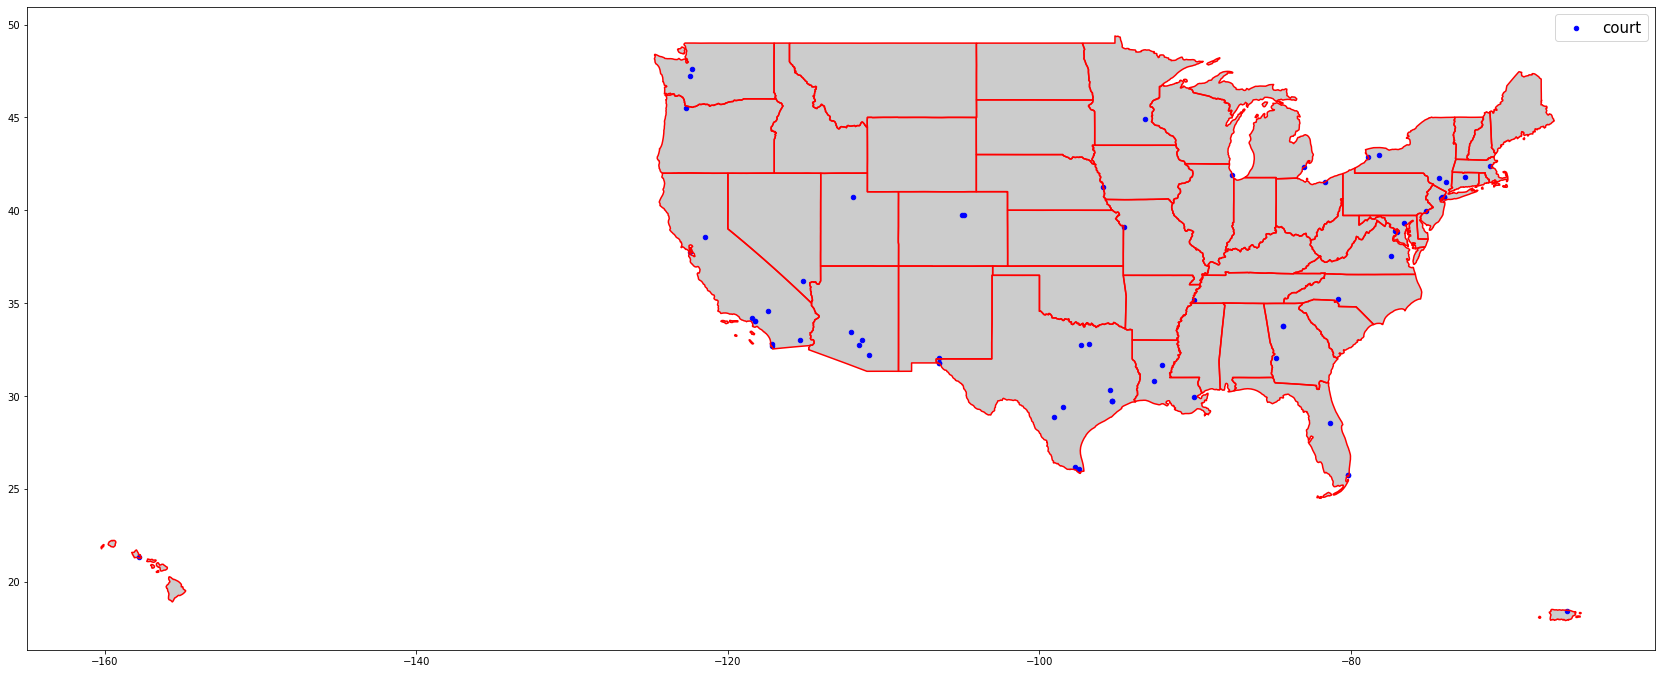

In [49]:
fig,ax = plt.subplots(figsize = (lonsize,latsize))
us_map.plot(ax = ax, alpha = 0.4, color='grey')
us_map.boundary.plot(ax=ax, color='red')
geo_df.plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label= "court")

plt.legend(prop={'size':15})

In [128]:
BBox

(-157.82287715716188, 55.148808200000005, 18.42368055, 47.6038321)

In [36]:
ruh_m = plt.imread('data/map.png')

In [37]:
latsize=abs((BBox[0] -BBox[1]))
lonsize=abs((BBox[2]-BBox[3]))
print(lonsize, latsize)

29.180151549999998 212.9716853571619


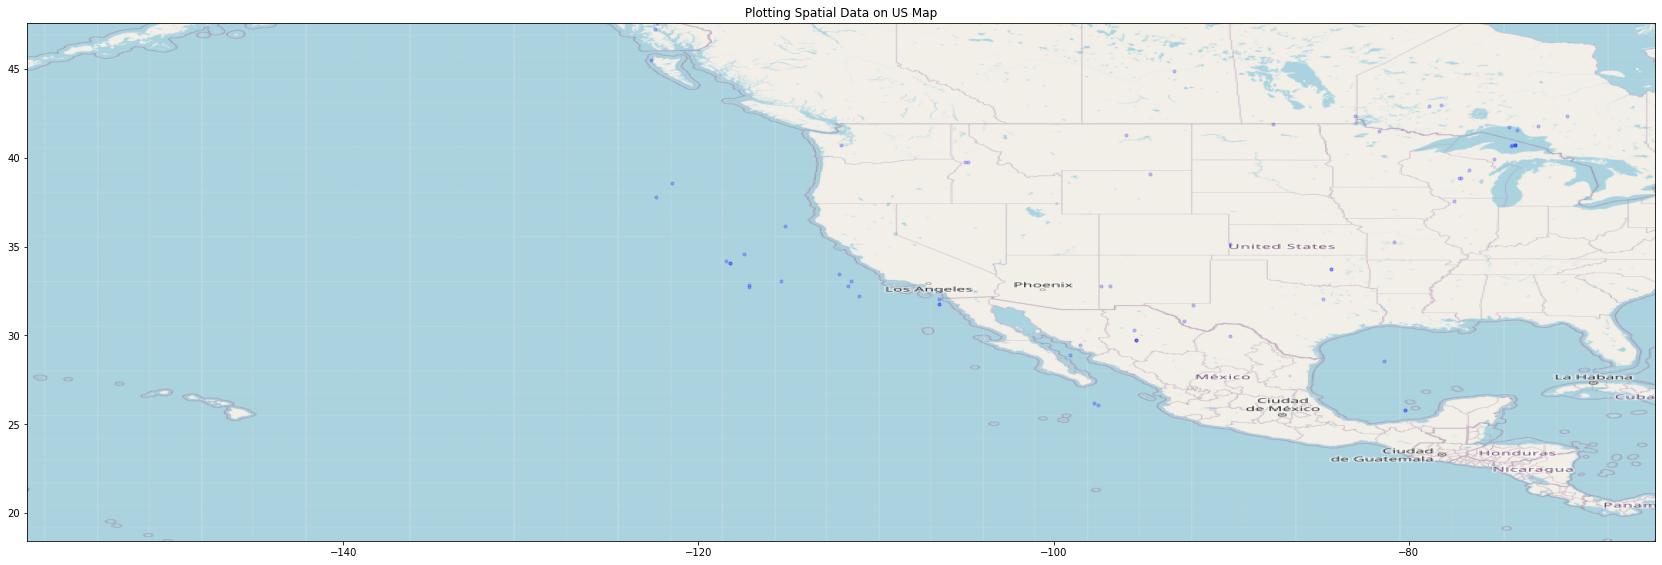

In [46]:
fig, ax = plt.subplots(figsize = (lonsize,latsize))
ax.scatter(geo_df.Longitude, geo_df.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on US Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')